In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



In [ ]:
data = sns.load_dataset('titanic')

#### **Types of Outliers**
**There are two main types of outliers:**

*  **1. Global outliers:** Global outliers are isolated data points that are far away from the main body of the data. They are often easy to identify and remove.
    * **Example:** In a class all student age will be approx. similar, but if see a record of a student with age as 500. It’s an outlier. It could be generated due to various reason.

*  **2. Contextual outliers:** Contextual outliers are data points that are unusual in a specific context but may not be outliers in a different context. They are often more difficult to identify and may require additional information or domain knowledge to determine their significance.

  * **Example:** World economy falls drastically due to COVID-19. Stock Market crashes due to the scam in 1992; in 2020 due to COVID-19. Usual data points will be near to each other whereas data point during the specific period will either up or down very far. This is not due to erroneous, but it’s an actual observation data point.

* **3. Collective Outliers:** A collection of observations anomalous but appear close to one another because they all have a similar anomalous value.

* **There are some techniques used to deal with outliers.**

* Deleting observations
* Transforming values
* Imputation
* Separately treating

## **Outlier Detection Methods in Machine Learning**



### **1. Statistical Methods:**

* **Z-Score:**This method calculates the standard deviation of the data points and identifies outliers as those with Z-scores exceeding a certain threshold (typically 3 or -3).

* **Interquartile Range (IQR):** IQR identifies outliers as data points falling outside the range defined by Q1-k*(Q3-Q1) and Q3+k*(Q3-Q1), where Q1 and Q3 are the first and third quartiles, and k is a factor (typically 1.5).

* **BoxPlot** boxplot is a visualization to understand the Outlers

#### **Z-Score**

This method assumes that the variable has a Gaussian distribution. It represents the number of standard deviations an observation is away from the mean:

using Z- score we can remove outliers from the data


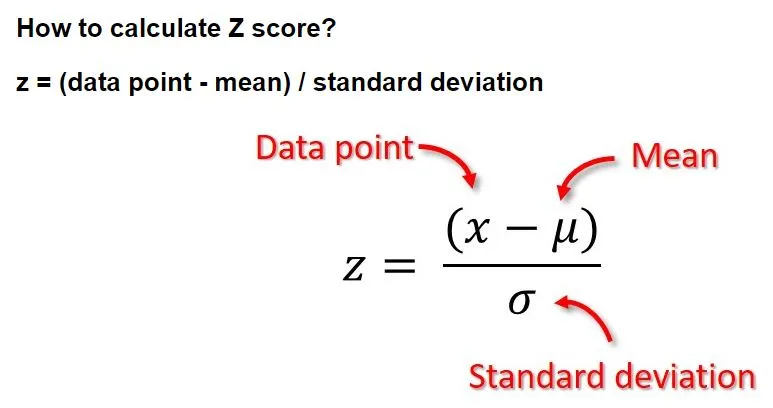

Here, we normally define outliers as points whose modulus of z-score is greater than a threshold value. This threshold value is usually greater than 2 (3 is a common value).

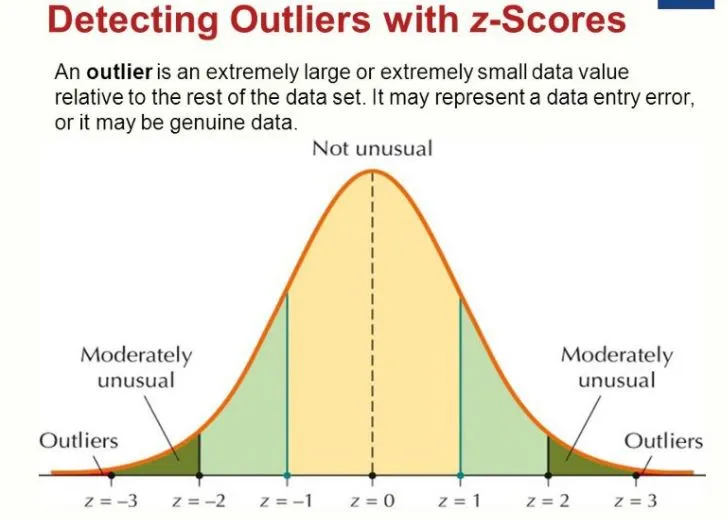

In [ ]:
data = sns.load_dataset('titanic')
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


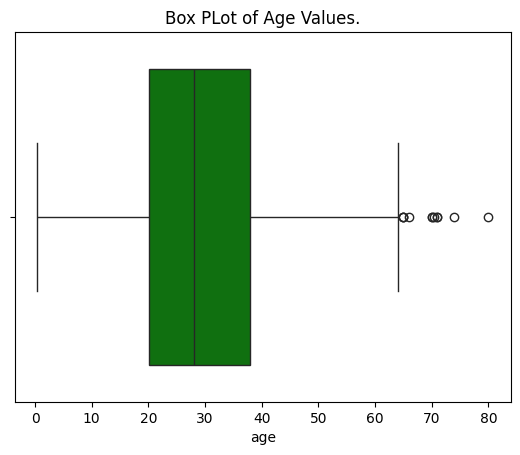

In [ ]:
sns.boxplot(data['age'],color='green',orient='h')
plt.title("Box PLot of Age Values.")

plt.show()

Implimenting z-Score to remove ouliers

In [ ]:
age = data['age']
mean = age.mean()
std = age.std()
# Z-sore
z_Score = np.abs((age-mean)/std)
z_Score.head()

,age
0,0.530005
1,0.571430
2,0.254646
3,0.364911
4,0.364911


In [ ]:
z_Score.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [ ]:
age[z_Score<1].info()

<class 'pandas.core.series.Series'>
Index: 516 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
516 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


In [ ]:
th1 = age[z_Score<2]

<Axes: ylabel='age'>

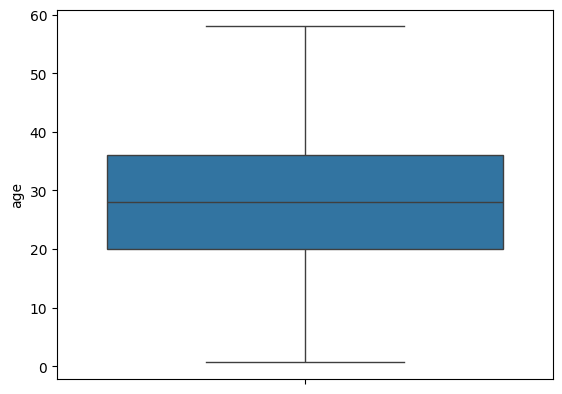

In [ ]:
sns.boxplot(th1)

In [ ]:
# need to know more about Zscore

#### **Inter Quartile Range**

<Axes: ylabel='fare'>

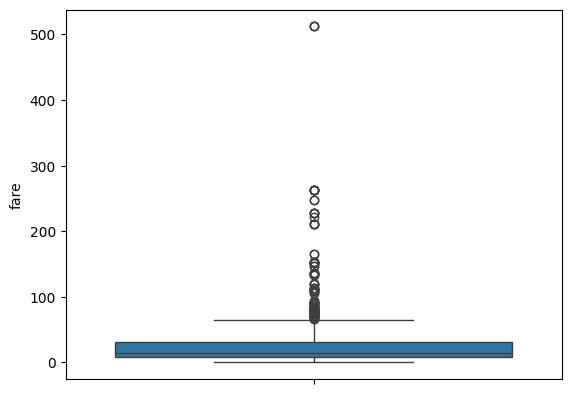

In [ ]:
sns.boxplot(data['fare'])

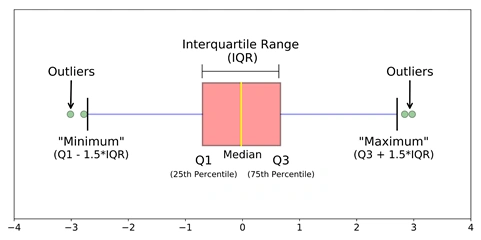

Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers. This shows in detail about outlier treatment in Python.

>Steps

* Sort the dataset in ascending order
* calculate the 1st and 3rd quartiles(Q1, Q3)
* compute IQR=Q3-Q1
* compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)


In [ ]:
def detect_Outliers(data):
  data = sorted(data)
  Q1 = np.percentile(data,25)
  Q3 = np.percentile(data,75)
  iqr = 1.5*(Q3-Q1)

  lower_bound = Q1-iqr
  upper_bound = Q3+iqr
  print(lower_bound,upper_bound)

detect_Outliers(data['fare'])

-26.724 65.6344


<Axes: ylabel='fare'>

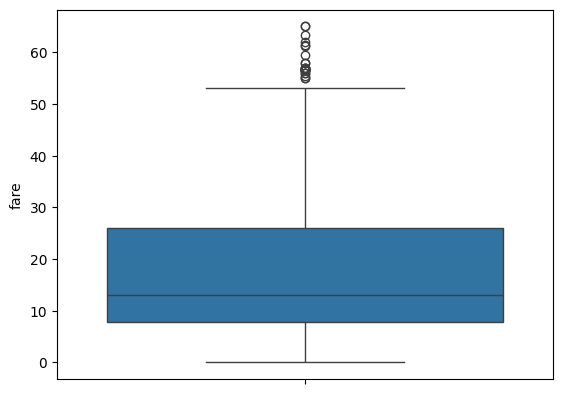

In [ ]:
def drop_outliers(df,field_name):
   Q1 = np.percentile(df[field_name],25)
   Q3 = np.percentile(df[field_name],75)
   iqr = 1.5*(Q3-Q1)

   df.drop(df[df[field_name]>(iqr+Q3)].index,inplace=True)
   df.drop(df[df[field_name]<(Q1-iqr)].index,inplace=True)


drop_outliers(data,'fare')
sns.boxplot(data['fare'])



In [ ]:
np.percentile(data['fare'],100)

512.3292

<Axes: ylabel='age'>

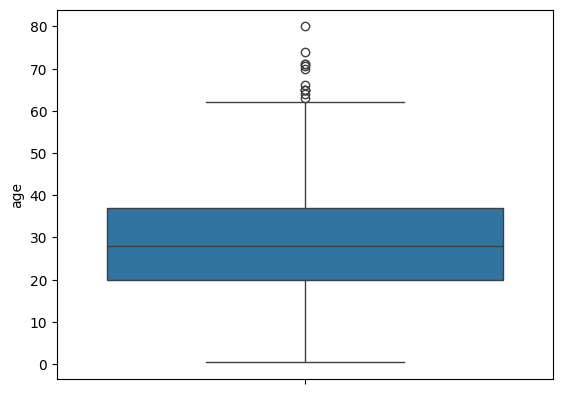

In [ ]:
Q1 = np.percentile(data['age'],25)
Q3 = np.percentile(data['age'],75)
iqr = 1.5*(Q3-Q1)
data.drop(data[data['age']>(iqr+Q3)].index,inplace=True)
data.drop(data[data['age']<(Q1-iqr)].index,inplace=True)

sns.boxplot(data['age'])


## **Transform Outliers**

Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.

### **Scaling**

* Log transformation
* Cube Root Normalization
* Box-transformation

Advantages:

* These techniques convert values in the dataset to smaller values.
* If the data has to many extreme values or skewed, this method helps to make your data normal.
* But These technique not always give you the best results.
* There is no lose of data from these methods
* In all these method box cox transformation gives the best result.

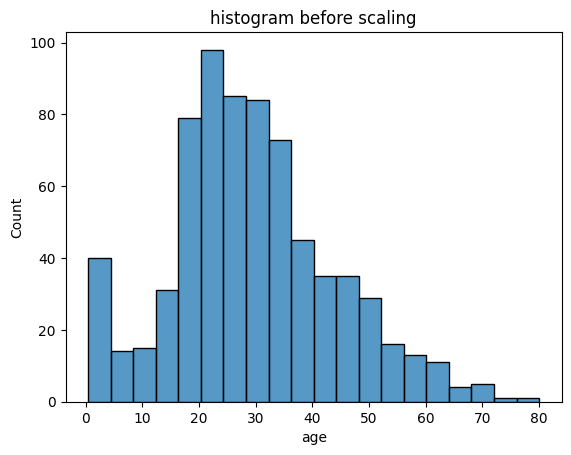

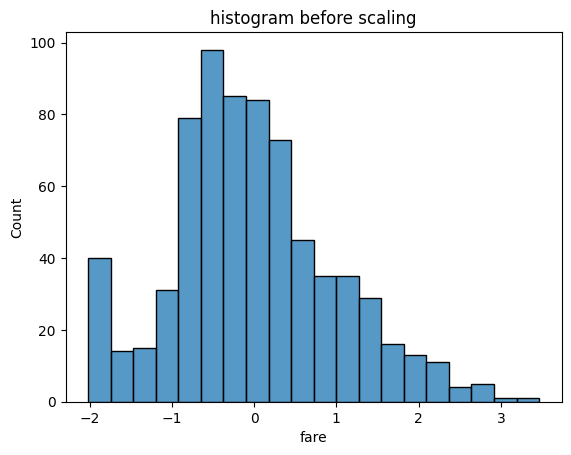

In [ ]:
from sklearn import preprocessing
sns.histplot(data['age'])
plt.title("histogram before scaling")
plt.show()
scalar = preprocessing.StandardScaler()
data['fare'] = scalar.fit_transform(data['age'].values.reshape(-1,1))
sns.histplot(data['fare'])
plt.title("histogram before scaling")
plt.show()

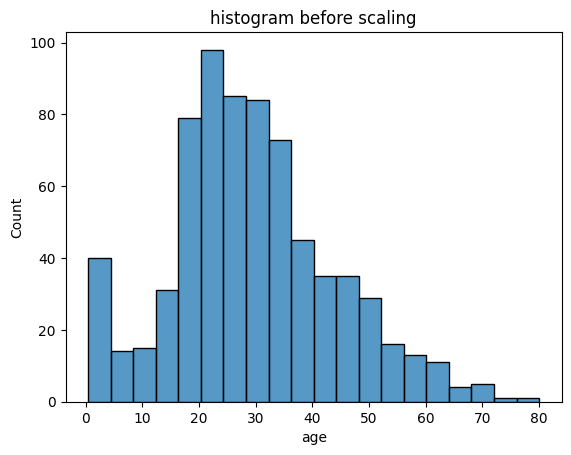

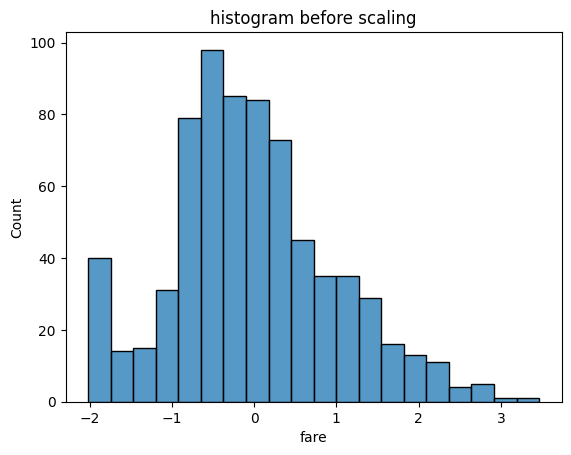

In [ ]:
from sklearn import preprocessing
sns.histplot(data['age'])
plt.title("histogram before scaling")
plt.show()
scalar = preprocessing.StandardScaler()
data['fare'] = scalar.fit_transform(data[['age']])
sns.histplot(data['fare'])
plt.title("histogram before scaling")
plt.show()

In [ ]:
data = sns.load_dataset('titanic')

 ####  **Log transformation**

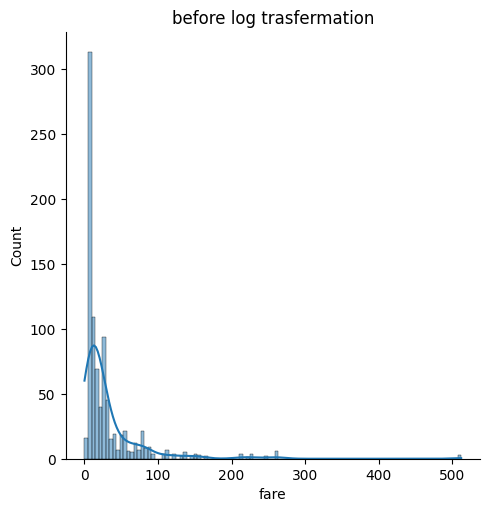

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


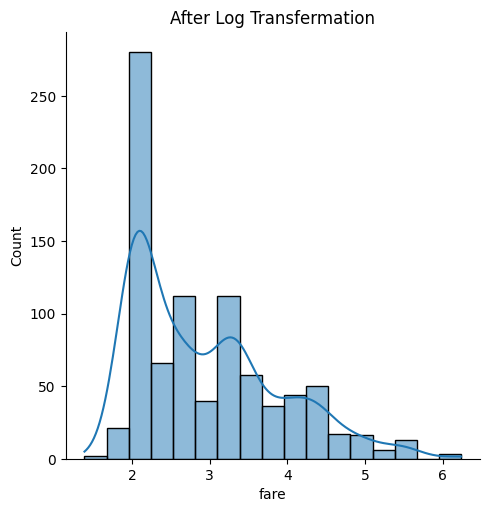

In [ ]:
# logtrnsfermation
sns.displot(data['fare'],kde=True)
plt.title("before log trasfermation")
plt.show()

fare_transformed = np.log(data['fare'])

sns.displot(fare_transformed,kde=True)
plt.title('After Log Transfermation')
plt.show()

#### **3. Cube Root Normalization**

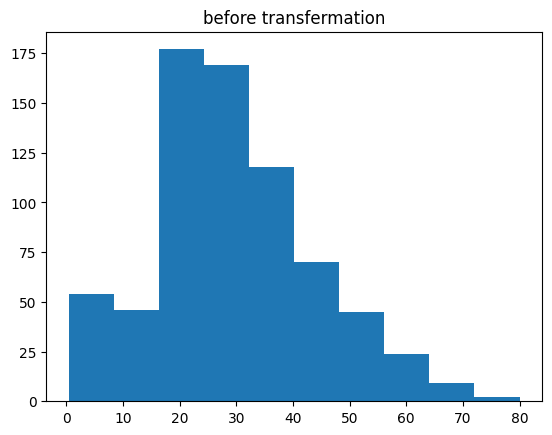

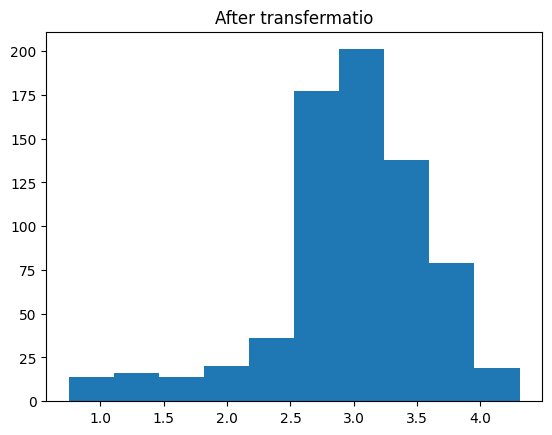

In [ ]:
# histrogram Cuberoot TRansfermation
plt.hist(data['age'])
plt.title("before transfermation")
plt.show()

transformed = data['age']**(1/3)

plt.hist(transformed)
plt.title("After transfermatio")
plt.show()

#### **4. Box-transformation**

In [ ]:
data = sns.load_dataset('titanic')

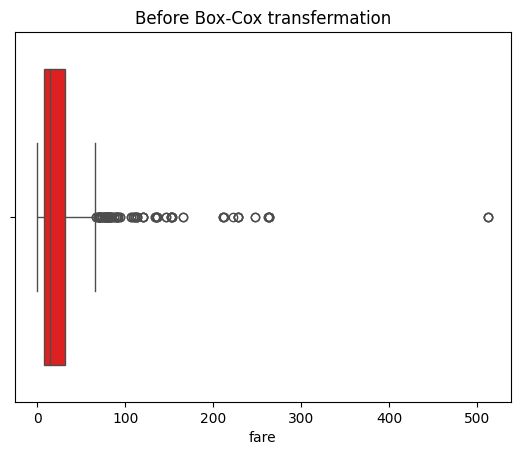

ValueError: Data must be positive.

In [ ]:
import scipy

sns.boxplot(data['fare'],color='red',orient='h')
plt.title('Before Box-Cox transfermation')
plt.show()

fitted_data, fitted_lambda = scipy.stats.boxcox(data['fare'])

sns.boxplot(fitted_data)
plt.title('Before Box-Cox transfermation',orient='h')
plt.show()




In [ ]:
data['age'][2]

AttributeError: module 'numpy' has no attribute 'index'

##  **Outlier Imputation**

* Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.

In [ ]:
data = sns.load_dataset('titanic')

64.8125


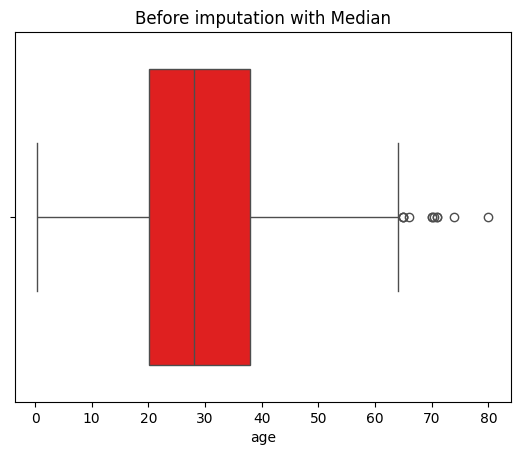

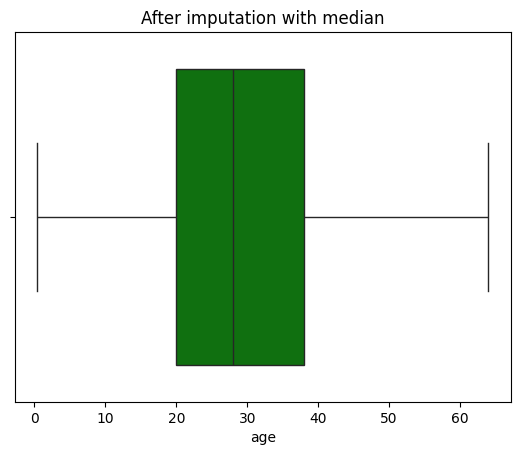

In [ ]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
iqr = Q3-Q1

lower_bound = Q1 - 1.5*iqr
upper_bound = Q3 + 1.5*iqr
print(upper_bound)
sns.boxplot(data['age'],orient='h',color='red')
plt.title('Before imputation with Median')
plt.show()

for i in data['age']:
  if i <lower_bound or i >upper_bound:
    data['age'] = data['age'].replace(i,np.median(data['age']))

sns.boxplot(data['age'],orient='h',color='green')
plt.title('After imputation with median')
plt.show()


* Mean Imputation with

we can also use mean imputation but
most of the time we don't use mean because mean most effected by outliers


* Zero value Imputation with

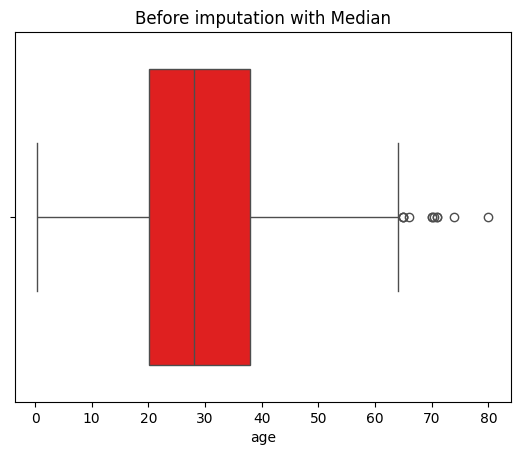

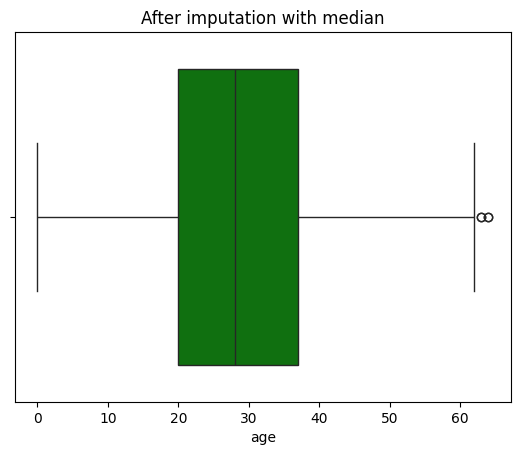

In [ ]:
data = sns.load_dataset('titanic')


sns.boxplot(data['age'],orient='h',color='red')
plt.title('Before imputation with Median')
plt.show()

for i in data['age']:
  if i <lower_bound or i >upper_bound:
    data['age'] = data['age'].replace(i,0)# replace with Zero

sns.boxplot(data['age'],orient='h',color='green')
plt.title('After imputation with median')
plt.show()
